The Karate Club Network is used in this colab. (https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Our objective will be to explore multiple graph statistics for that graph.

**Note:** Make a copy before you proceed.

## Setup
I used NetworkX in this Colab.

In [1]:
import networkx as nx

## Zachary's karate club network


In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

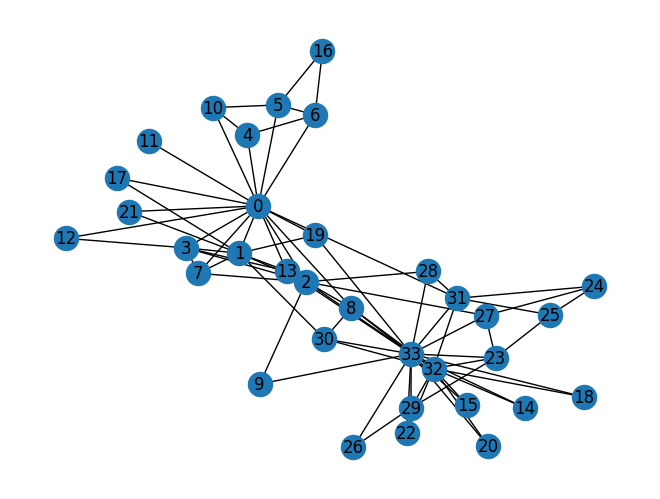

In [3]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network?
Average Degree = $ k = \frac{2*\text{Number of Edges}}{Number of Nodes}$.

In [4]:
def average_degree1(num_nodes):

  total_degree = 0

  # We use for loop to calculate the total degree of all nodes in the graph
  for node in G.nodes:
    total_degree += G.degree(node)

  if num_nodes > 0:
    avg_degree = total_degree/num_nodes
  else:
    avg_degree = 0

  return avg_degree

# Alternative way to calculate average degree using formula

def average_degree2(num_edges, num_nodes):

  avg_degree = (2 * num_edges)/num_nodes
  return avg_degree

# Check the number of nodes and edges in a given graph
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

avg_degree1 = average_degree1(num_nodes)
avg_degree2 = average_degree2(num_edges, num_nodes)

print("Average degree of karate club network is {}".format(avg_degree1))
print("Average degree of karate club network using formula is {}".format(avg_degree2))

Average degree of karate club network is 4.588235294117647
Average degree of karate club network using formula is 4.588235294117647


## Question 2: What is the number of classes in karate club dataset?
nx.set_node_attributes function is used to assign a 'class' attribute to each node based on the 'club' attribute. This is a way to introduce class labels to the nodes.


In [5]:
def get_num_classes(graph):

  node_classes = set(nx.get_node_attributes(graph, 'class').values())
  num_classes = len(node_classes)
  return num_classes

# Assuming we have class labels assigned to nodes:
nx.set_node_attributes(G, {node: G.nodes[node]['club'] for node in G.nodes}, 'class')

num_classes = get_num_classes(G)
print("Number of classes using node attributes:", num_classes)

Number of classes using node attributes: 2


## Question 3: What is the average clustering coefficient of the karate club network?

The average clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.

The equation for clustering Coeffiecent of undirected graph is $e_v = \frac{2*\text{Number of Triangle incident to node i}}{\text{(Degree of i)*(Degree of i -1)}}$.


In [6]:
def average_clustering_coefficient1(graph):
    total_nodes = len(graph.nodes())
    if total_nodes < 3:
        # Clustering coefficient is not defined for graphs with less than 3 nodes
        return 0.0

    total_clustering_coefficient = 0.0

    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        num_neighbors = len(neighbors)

        if num_neighbors >= 2:
            total_triangles = 0
            for i in range(num_neighbors - 1):
                for j in range(i + 1, num_neighbors):
                    if graph.has_edge(neighbors[i], neighbors[j]):
                        total_triangles += 1

            clustering_coefficient = 2.0 * total_triangles / (num_neighbors * (num_neighbors - 1))
            total_clustering_coefficient += clustering_coefficient

    avg_cluster_coef = total_clustering_coefficient / total_nodes
    return avg_cluster_coef

# Calculate average clustering coefficient using the custom function
avg_cluster_coef1 = average_clustering_coefficient1(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef1))

#Alternative way to calculate average clustering coefficient

def average_clustering_coefficient2(G):

    avg_cluster_coef = nx.average_clustering(G)

    return avg_cluster_coef

avg_cluster_coef2 = average_clustering_coefficient2(G)
print("Average clustering coefficient of karate club network using build in function is {}".format(avg_cluster_coef2))

Average clustering coefficient of karate club network is 0.5706384782076823
Average clustering coefficient of karate club network using build in function is 0.5706384782076823


## Question 4: What is the closeness centrality for the karate club network node 5?

The equation for closeness centrality is $c_v = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$.

In [ ]:
def closeness_centrality1(graph, node):
    # Get the set of nodes in the graph
    all_nodes = set(graph.nodes())
    total_node = len(all_nodes)

    # Initialize the total closeness centrality
    total_closeness = 0

    # Iterate over all other nodes in the graph
    for other_node in all_nodes:
        if other_node != node:
            try:
                # Calculate the shortest path distance
                shortest_path_length = nx.shortest_path_length(graph, source=node, target=other_node)
                # Add the reciprocal of the distance to the total closeness
                total_closeness += shortest_path_length
            except nx.NetworkXNoPath:
                # If there is no path between nodes, skip and continue
                continue

    # Calculate the closeness centrality for the given node
    closeness_centrality = (total_node - 1) / total_closeness if total_closeness != 0 else 0

    return closeness_centrality

node = 5
closeness1 = closeness_centrality1(G, node)
print("The node {} has closeness centrality {}".format(node, closeness1))

#Alternative way to calculate Closeness centrality using build in function

def closeness_centrality2(G, node=5):

  closeness = 0
  closeness = nx.closeness_centrality(G, u=node)

  return closeness

node = 5
closeness2 = closeness_centrality2(G, node=node)
print("The node 5 has closeness centrality using build in function {}".format(closeness2))

The node 5 has closeness centrality 0.38372093023255816
The node 5 has closeness centrality using build in function 0.38372093023255816


# **Example**
Networkx function return the normalized closeness centrality values by default so they are ready to be compared across graphs of different sizes without any additional scaling. If we use different library or formula to calculate closeness centrality then we need to normalize it. Here I add a simple example in which first they calculate closeness centrality of each node by using the formula (mentioned above) and then multiple it with N-1 (N is total number of node) to normalize it and this is difference from the one that we discussed in the lecture.

The final equation for closeness centrality is $c_v = \frac{N-1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$.


Node 1: Closeness Centrality = 0.5000
Node 2: Closeness Centrality = 0.7500
Node 3: Closeness Centrality = 0.7500
Node 4: Closeness Centrality = 0.5000


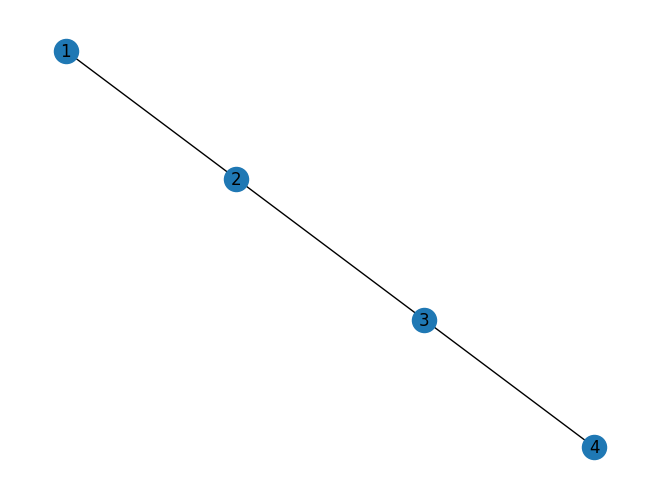

In [ ]:
# Example to understand the calculation
# Notice that networkx closeness centrality returns the normalized closeness directly, Discuss how does it is different from the on that we discussed in the lecture
# Create a graph (you can use any graph)
H = nx.Graph()
H.add_edges_from([(1, 2), (2, 3), (3, 4)])
# Visualize the graph
nx.draw(H, with_labels = True)

# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(H)

# Print closeness centrality for each node
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")  #Here .4f is used which means upto 4 decimal point

# avg_degree = nx.average_degree_connectivity(H)

# print("Average Degree:")
# print(avg_degree)

Calculation of above result:

$c_1 = \frac{4-1}{1+2+3}=\frac{3}{6}=0.5$,
$c_2 = \frac{4-1}{1+1+2}=\frac{3}{4}=0.75$,
$c_3 = \frac{4-1}{1+1+2}=\frac{3}{4}=0.75$,
$c_4 = \frac{4-1}{1+2+3}=\frac{3}{6}=0.5$

## Question 5: Can we compute the link level features of the karate club network. If so, provide an method/algorithm of your choice for computing the link-level features.

In [ ]:
import pandas as pd
from math import log

# Function to compute link-level features
def compute_link_features(graph):
    link_features = {}
    for edge in graph.edges():
        node1, node2 = edge

        # Common Neighbors
        common_neighbors = list(nx.common_neighbors(graph, node1, node2))

        # Jaccard Coefficient
        if len(common_neighbors) > 0:
            jaccard_coefficient = len(common_neighbors) / len(set(graph.neighbors(node1)).union(graph.neighbors(node2)))
        else:
            jaccard_coefficient = 0

        # Adamic-Adar Index
        adamic_adar_index = sum(1 / log(graph.degree(neighbor)) for neighbor in common_neighbors)

        link_features[edge] = {
            'Common Neighbors': common_neighbors,
            'Jaccard Coefficient': jaccard_coefficient,
            'Adamic-Adar Index': adamic_adar_index
        }

    return link_features

# Compute link-level features for the karate club network
link_features = compute_link_features(G)

# Convert link-level features to a pandas DataFrame
df = pd.DataFrame.from_dict(link_features, orient='index')

# Display the entire DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df)

                              Common Neighbors  Jaccard Coefficient  Adamic-Adar Index
0  1                 [2, 3, 7, 13, 17, 19, 21]             0.388889           6.130717
   2                          [1, 3, 7, 8, 13]             0.238095           2.977248
   3                         [1, 2, 7, 12, 13]             0.294118           3.674792
   4                                   [6, 10]             0.117647           1.631587
   5                                   [6, 10]             0.111111           1.631587
   6                                    [4, 5]             0.111111           1.631587
   7                                 [1, 2, 3]             0.176471           1.447525
   8                                       [2]             0.050000           0.434294
   10                                   [4, 5]             0.117647           1.631587
   11                                       []             0.000000           0.000000
   12                                      